In [10]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


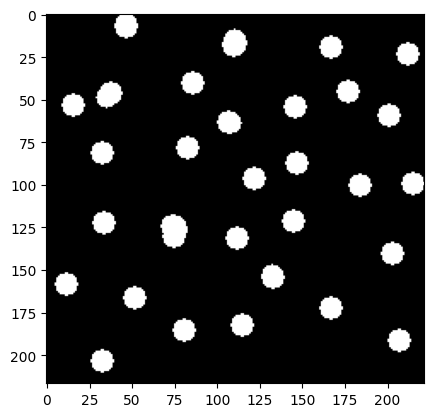

In [16]:
img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

def erode(img, kernel):
    # Define as dimensões da imagem e do elementro estruturante
    rows, cols = img.shape
    krows, kcols = kernel.shape

    # Inicializa a imagem resultante
    img_erode = np.zeros((rows, cols), dtype=np.uint8)

    # Percorre cada pixel da imagem
    for i in range(rows):
        for j in range(cols):
            # Inicializa o valor mínimo
            min_value = 255

            # Percorre cada pixel do elemento estruturante
            for ki in range(krows):
                for kj in range(kcols):
                    # Calcula as coordenadas do pixel no estruturante
                    krow = ki - krows // 2
                    kcol = kj - kcols // 2

                    # Verifica se o pixel está dentro da imagem
                    if (i + krow) >= 0 and (i + krow) < rows and \
                       (j + kcol) >= 0 and (j + kcol) < cols:
                        # Verifica se o pixel é um elemento do kernel
                        if kernel[ki][kj] == 1:
                            # Atualiza o valor mínimo encontrado
                            min_value = min(min_value, img[i + krow][j + kcol])

            # Define o valor do pixel na imagem resultante
            img_erode[i][j] = min_value

    return img_erode


def dilate(img, kernel):
    # Define as dimensões da imagem e do estruturante
    rows, cols = img.shape
    krows, kcols = kernel.shape

    # Inicializa a imagem resultante
    img_dilate = np.zeros((rows, cols), dtype=np.uint8)

    # Percorre cada pixel da imagem
    for i in range(rows):
        for j in range(cols):
            # Inicializa o valor máximo
            max_value = 0

            # Percorre cada pixel do elemento estruturante
            for ki in range(krows):
                for kj in range(kcols):
                    # Calcula as coordenadas do pixel do elemento estruturante
                    krow = ki - krows // 2
                    kcol = kj - kcols // 2

                    # Verifica se o pixel está dentro da imagem
                    if (i + krow) >= 0 and (i + krow) < rows and \
                       (j + kcol) >= 0 and (j + kcol) < cols:
                        # Verifica se o pixel é um elemento do kernel
                        if kernel[ki][kj] == 1:
                            # Atualiza o valor máximo encontrado
                            max_value = max(max_value, img[i + krow][j + kcol])

            # Define o valor do pixel na imagem resultante
            img_dilate[i][j] = max_value

    return img_dilate


# Define o tamanho do elemento estruturante
radius = 6
kernel = np.zeros((2*radius+1, 2*radius+1), dtype=np.uint8)
cv2.circle(kernel, (radius, radius), radius, 1, -1)

# Aplica a operação de abertura
img_erode = erode(img1, kernel)
img_aberta = dilate(img_erode, kernel)


# Mostrar resultados
plt.imshow(img_aberta, cmap='gray', vmin=0, vmax=255)

2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


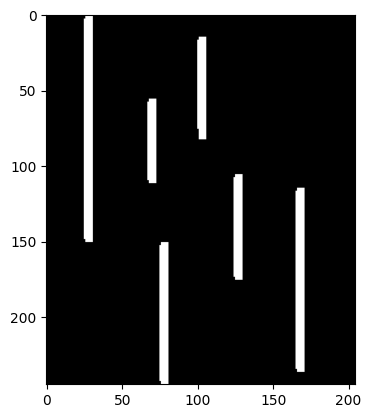

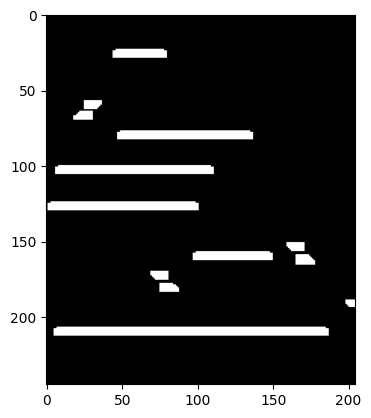

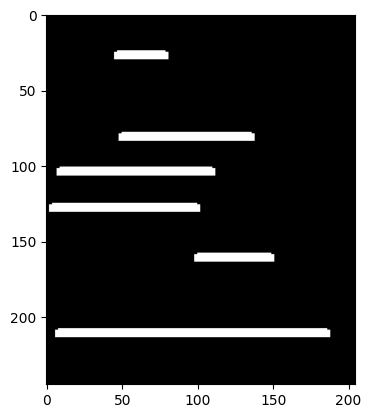

In [5]:
img = cv2.imread('art2.png', cv2.IMREAD_GRAYSCALE)

# Cria os elementos estruturantes para as operações de erosão e dilatação
kernel_vertical = np.ones((9, 3), np.uint8)
kernel_horizontal = np.ones((3, 9), np.uint8)
kernel_horizontal2 = np.ones((4, 16), np.uint8)


# Abertura vertical
linhas_verticais = dilate(erode(img,kernel_vertical), kernel_vertical)

# Abertura horizontal
linhas_horizontais = dilate(erode(img,kernel_horizontal), kernel_horizontal)

# Abertura horizontal
linhas_horizontais2 = dilate(erode(img,kernel_horizontal2), kernel_horizontal2)

# Mostrar resultados
plt.imshow(linhas_verticais, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(linhas_horizontais, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(linhas_horizontais2, cmap='gray', vmin=0, vmax=255)
plt.show()

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

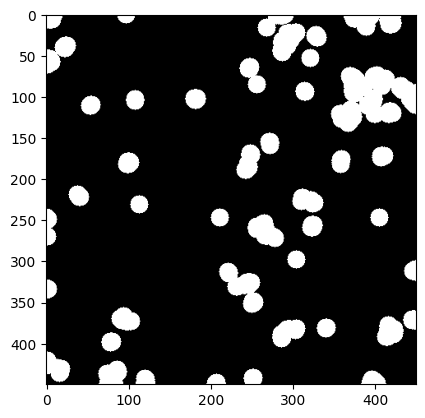

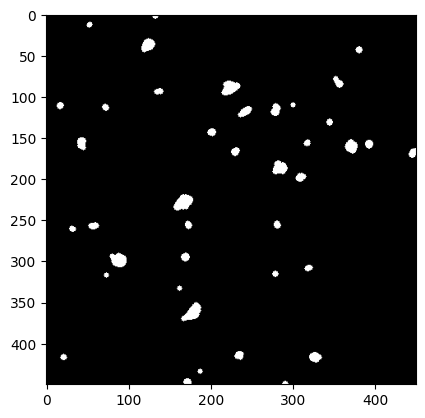

In [17]:

img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

# Aplica a operação de threshold
ret, img_bin = cv2.threshold(img3, 210, 255, cv2.THRESH_BINARY)

# Define o tamanho do elemento estruturante
radius = 11
kernel = np.zeros((2*radius+1, 2*radius+1), dtype=np.uint8)
cv2.circle(kernel, (radius, radius), radius, 1, -1)

# Aplica a operação de abertura
img_aberta = dilate(erode(img_bin,kernel), kernel)

# Define o tamanho do elemento estruturante
radius = 3
kernel = np.zeros((2*radius+1, 2*radius+1), dtype=np.uint8)
cv2.circle(kernel, (radius, radius), radius, 1, -1)

# Aplica a operação de fechada
img_fechada = erode(dilate(img_bin,kernel), kernel)
img_fechada = 255 - img_fechada

# Exibir a imagem resultante com os círculos
plt.imshow(img_aberta, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(img_fechada, cmap='gray', vmin=0, vmax=255)
plt.show()



4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

Quantidade de feijões: 89


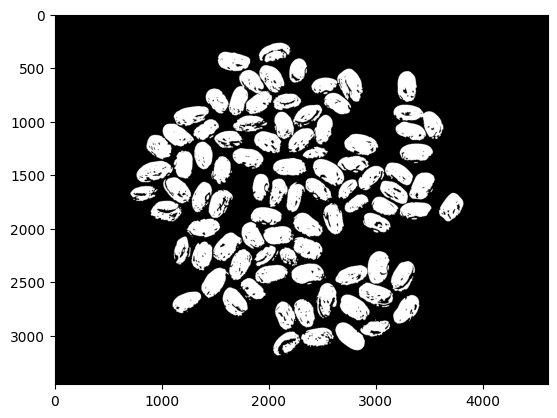

In [95]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

# Aplicar threshold usando método de Otsu
_, thresh = cv2.threshold(img4, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Aplicar operações morfológicas para remover ruídos e preencher buracos
kernel = np.ones((6,6), np.uint8)
img_aberta = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Encontrar contornos
contours, _ = cv2.findContours(img_aberta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Contar quantidade de feijões
count = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 880: # Supondo que o tamanho mínimo de um feijão é de 880 pixels
        count += 1
        cv2.drawContours(img4, [contour], 0, (0, 0, 255), 2)

# Mostrar resultados
print("Quantidade de feijões:", count)
plt.imshow(img_aberta, cmap='gray', vmin=0, vmax=255)
plt.show()
